# 성능평가




## #01. 패키지 참조 

In [2]:
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings('ignore')

In [3]:
origin = pd.read_excel('iris.xlsx')

origin.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df=origin.copy()

In [5]:
df['Species'] = origin['Species'].map({'setosa':0,'versicolor':1,'virginica':2})
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
x = df.loc[:,'Sepal.Length':'Petal.Width']
y = df['Species']

In [7]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [8]:
x.shape , y.shape

((150, 4), (150,))

In [9]:
k_num = range(1,104)
k_scores = []

for k in k_num : 
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn,x,y,cv=2,scoring='accuracy')
    k_scores.append(score.max())

k_scores

NameError: name 'cross_val_score' is not defined

### 가장 높은 정확도 찾기

In [10]:
max_acc = k_scores[0]
max_index = 0
for i in range(1,len(k_scores)):
    if max_acc <k_scores[i]:
        max_acc = k_scores[i]
        max_index = i

print("최대 정확도: {0}, 최대 정확도를 갖는 k: {1}".format(max_acc, max_index+1))
  

최대 정확도: 0.9733333333333334, 최대 정확도를 갖는 k: 6


In [11]:
max_acc = max(k_scores)
max_index = k_scores.index(max_acc)
print("최대 정확도: {0}, 최대 정확도를 갖는 k: {1}".format(max_acc, max_index+1))


최대 정확도: 0.9733333333333334, 최대 정확도를 갖는 k: 6


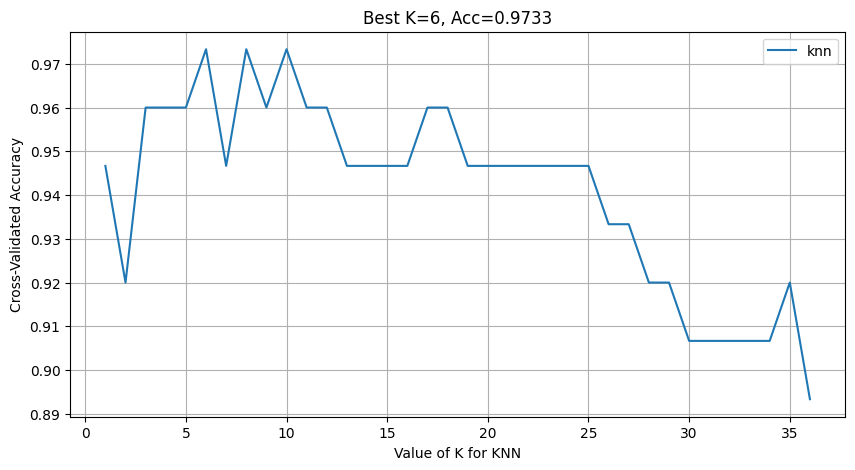

In [13]:
plt.figure(figsize=(10, 5))
sb.lineplot(x=k_num, y=k_scores, label='knn')
plt.xlabel("Value of K for KNN")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Best K={0}, Acc={1:.4f}".format(max_index+1, max_acc))
plt.grid()
plt.show()
plt.close()